In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
# Import seaborn with alias sns
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from PIL import Image

from datetime import datetime
# Import Counter
from collections import Counter
from collections import defaultdict


import missingno as msno

from urllib.parse import urlparse
import os
import re

import nltk
# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from wordcloud import WordCloud
# Import WordNetLemmatizer
from nltk. stem import WordNetLemmatizer
from nltk.tokenize import  regexp_tokenize
from gensim.models.tfidfmodel import TfidfModel
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Import spacy
import spacy

#### seaborn, missingno, nltk, spacy


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [8]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 262.6 kB/s eta 0:37:19
     -------------------------------------- 0.1/587.7 MB 804.6 kB/s eta 0:12:11
     ---------------------------------------- 1.0/587.7 MB 5.6 MB/s eta 0:01:45
     ---------------------------------------- 1.9/587.7 MB 8.3 MB/s eta 0:01:11
     ---------------------------------------- 2.5/587.7 MB 9.0 MB/s eta 0:01:06
     --------------------------------------- 3.3/587.7 MB 10.1 MB/s eta 0:00:58
     --------------------------------------- 4.2/587.7 MB 11.8 MB/s eta 0:00:50
     --------------------------------------- 5.0/587.7 MB 11.9 MB/s eta 0:00:50
     --------------------------------------- 5.8/587.7 MB 12.4 MB/s eta 0:00:47
     --------------------------------------- 6.5/587.7 MB 13.0 MB/s eta 0:00:45
     --------------------------------------- 7.0/587.7

In [10]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 655.4 kB/s eta 0:00:20
     -- ------------------------------------- 0.7/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 6.8 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 8.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.8/12.8 MB 9.0 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 10.1 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 10.8 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 11.0 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 12.2 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 12

## Prétraitement des données

In [11]:
thn_df = pd.read_csv("C:/Users\hp\PycharmProjects\CyberWatchEngine\cyberWatchEngine\items2802.csv")

In [12]:
thn_df.head()

,alterimagetext,date,description,domainname,imagepath,label,link,tags,title
0,LockBit Ransomware Group Resurfaces After Law ...,"Feb 26, 2024",The threat actors behind the LockBit ransomwa...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/lockbit-rans...,Dark Web / Threat Intelligence,LockBit Ransomware Group Resurfaces After Law ...
1,Cybersecurity for Healthcare—Diagnosing the Th...,"Feb 21, 2024","On Thanksgiving Day 2023, while many American...",thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/cybersecurit...,Endpoint Security / Healthcare,Cybersecurity for Healthcare—Diagnosing the Th...
2,How to Achieve the Best Risk-Based Alerting (B...,"Feb 19, 2024",Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...
3,LockBit Ransomware Operation Shut Down; Crimin...,"Feb 20, 2024",The U.K. National Crime Agency (NCA) on Tuesd...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/lockbit-rans...,Ransomware / Data Protection,LockBit Ransomware Operation Shut Down; Crimin...
4,How Businesses Can Safeguard Their Communicati...,"Feb 17, 2024",Efficient communication is a cornerstone of b...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/how-business...,Cybersecurity / Risk Mitigation,How Businesses Can Safeguard Their Communicati...


In [13]:
thn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   alterimagetext  12119 non-null  object
 1   date            12119 non-null  object
 2   description     12119 non-null  object
 3   domainname      12119 non-null  object
 4   imagepath       12112 non-null  object
 5   label           12119 non-null  object
 6   link            12119 non-null  object
 7   tags            3198 non-null   object
 8   title           12119 non-null  object
dtypes: object(9)
memory usage: 852.2+ KB


In [14]:
# Assuming 'date' is the column containing date strings in our DataFrame thn_df  
# 'date' is the column we want to check

In [15]:
thn_df['date'][0:5]

0    Feb 26, 2024
1    Feb 21, 2024
2    Feb 19, 2024
3    Feb 20, 2024
4    Feb 17, 2024
Name: date, dtype: object

In [16]:
#datetime.datetime.strptime(input_date_string, input_format).strftime(output_format)
#For the specific example, you could do:

datetime.strptime('Feb 25, 2024', '%b %d, %Y').strftime('%d/%m/%Y')

'25/02/2024'

In [17]:
# convert the string column to a datetime format using pd.to_datetime()
thn_df['date'] = thn_df['date'].apply(lambda d: datetime.strptime(d, '%b %d, %Y').strftime('%d/%m/%Y'))

In [18]:
thn_df['date'].unique()

array(['26/02/2024', '21/02/2024', '19/02/2024', ..., '03/03/2014',
       '02/03/2014', '28/02/2014'], dtype=object)

In [19]:
# convert the 'Date' column to datetime format
thn_df['date']= pd.to_datetime(thn_df['date'], dayfirst=True)

In [20]:
thn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  12119 non-null  object        
 1   date            12119 non-null  datetime64[ns]
 2   description     12119 non-null  object        
 3   domainname      12119 non-null  object        
 4   imagepath       12112 non-null  object        
 5   label           12119 non-null  object        
 6   link            12119 non-null  object        
 7   tags            3198 non-null   object        
 8   title           12119 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 852.2+ KB


In [21]:
len(thn_df['alterimagetext'].unique())

8679

Certaines images sont dupliquées

In [22]:
len(thn_df['description'].unique())

8679

In [23]:
len(thn_df['imagepath'].unique())

8665

In [24]:
thn_df['imagepath'][0:5].to_list()

['https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjt4tXDeSd9wtd0IkQGa2sECge3cv83iF2b3N3IfPyl7BHgcxRZEp8p9UMqzkmqKW6bPkyge03nhBnHCZ5Es21UfxZLd8XWCTmoJZjKPy7Y4isAZLFj8DEhJ-SAqfii04_9oSYVTF77Xz91f3knc-8nRVdZibPVQcny00Fq8crGwhopNyT5bzlql0JndksH/s728-rw-e365/lockbit.jpg',
 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiBlEFPEVNM4jnXssAF3BxzBlQMYFa2EslLaGrXUEBK12LE7HKfYB0xmkkSXICa0bCg9L4szoY_3aoTV7pOF4XpDng8AiHZaTx0RH3HmKKG_xfT6wqvQ7zOS_SXje985ewnxMb_nL1mkzPaktFv1fkyb85xe6a0tqJKodQZG0s7v1pS6W8cxgWpiRiZthU/s728-rw-e365/header.png',
 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEii1ckRMYOfKko9MuRs3D8SJSJmxeK_lggSExCVhp3hYbNQKFJ0gqESTp6n5bs6jo3pAYHYL9AoknLSDwDe6W5JVM6D0tOMDg1AMgyHbpWaB9IhgO-gz7b1PwL3O0SiG9bfg3cuFHombLc9LmfX9FDLiITiHgsWvM6_tHCJyx9K2gJDV4jPR8vUx2g-m-A/s728-rw-e365/THN-Visual.png',
 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhmlKvEIi7lmCTLPAxqFveosiN0EqF-D8TMul6Ni8h-Eqn-TGPEhrz564WTCScUpfuIXFywyrMeWtmIEGqNP1vqIjNAOPWfbH7dfghf

In [25]:
set(thn_df['imagepath'].str.split('/')[2])

{'',
 'AVvXsEii1ckRMYOfKko9MuRs3D8SJSJmxeK_lggSExCVhp3hYbNQKFJ0gqESTp6n5bs6jo3pAYHYL9AoknLSDwDe6W5JVM6D0tOMDg1AMgyHbpWaB9IhgO-gz7b1PwL3O0SiG9bfg3cuFHombLc9LmfX9FDLiITiHgsWvM6_tHCJyx9K2gJDV4jPR8vUx2g-m-A',
 'R29vZ2xl',
 'THN-Visual.png',
 'b',
 'blogger.googleusercontent.com',
 'https:',
 'img',
 's728-rw-e365'}

In [26]:
thn_df['domainname'].unique()

array(['thehackernews.com'], dtype=object)

Aucun lien avec d'autres sites web

In [27]:
len(thn_df['link'].unique())

8682

In [28]:
thn_df['link'][0:5].tolist()

['https://thehackernews.com/2024/02/lockbit-ransomware-group-resurfaces.html',
 'https://thehackernews.com/2024/02/cybersecurity-for-healthcarediagnosing.html',
 'https://thehackernews.com/2024/02/bye-bye-siem-hello-risk-based-alerting.html',
 'https://thehackernews.com/2024/02/lockbit-ransomware-operation-shut-down.html',
 'https://thehackernews.com/2024/02/how-businesses-can-safeguard-their.html']

In [29]:
thn_df['tags'].unique()

array(['Dark Web / Threat Intelligence', 'Endpoint Security / Healthcare',
       'Network Detection and Response', ..., 'DevSecOps / Secure Coding',
       'Mobile Threat Advisory', 'Threat Intelligence / Botnet'],
      dtype=object)

In [30]:
len(thn_df['tags'].unique())

1168

In [31]:
# Split the 'tags' column based on the '/' character
thn_df[['tag1', 'tag2']] = thn_df['tags'].str.split('/', expand=True, n=1)

# If you have more than two tags, you can continue the pattern
# thn_df[['tag1', 'tag2', 'tag3']] = thn_df['tags'].str.split('/', expand=True, n=2)

# Print or further process the resulting DataFrame
thn_df[['tags', 'tag1', 'tag2']][0:9]


,tags,tag1,tag2
0,Dark Web / Threat Intelligence,Dark Web,Threat Intelligence
1,Endpoint Security / Healthcare,Endpoint Security,Healthcare
2,Network Detection and Response,Network Detection and Response,None
3,Ransomware / Data Protection,Ransomware,Data Protection
4,Cybersecurity / Risk Mitigation,Cybersecurity,Risk Mitigation
5,Cybersecurity / Data Breach,Cybersecurity,Data Breach
6,Financial Security / Cyber Threats,Financial Security,Cyber Threats
7,SaaS Security / Data Breach,SaaS Security,Data Breach
8,Phishing Attack / Malware,Phishing Attack,Malware


This code uses the str.split method to split the strings in the 'tags' column at the '/' character. The expand=True parameter ensures that the result is returned as a DataFrame with separate columns. The n parameter specifies the maximum number of splits, and it is set to 1 here to split at the first occurrence of '/'.

In [32]:
thn_df['tag1'].unique()

array(['Dark Web ', 'Endpoint Security ',
       'Network Detection and Response', 'Ransomware ', 'Cybersecurity ',
       'Financial Security ', 'SaaS Security ', 'Phishing Attack ',
       'Cyber Attack ', 'National Security ', 'Data Breach ', 'Webinar ',
       'Hacktivist ', 'Artificial Intelligence ', 'Malware ',
       'Cyber Espionage ', 'Intelligence Agency ', 'Cyber Threat ',
       'Cyber Crime ', 'Threat Intelligence ', 'Firmware Security ',
       'Vulnerability ', 'Zero Trust ', 'Supply Chain Attack ',
       'Website Security ', 'Data Privacy ', 'Red Teaming ',
       'Active Directory ', 'Cloud Security ', 'Steganography ',
       'SecOps ', 'Domain Hijacking ', 'Software Security ',
       'Patch Tuesday ', 'Cybercrime ', 'SOC Automation ', 'Privacy ',
       'Quantum Computing ', 'Network Security ', 'Hacktivism ',
       'Browser Security ', 'Server Security ', 'Security Assessment ',
       'Cryptocurrency ', 'Authentication Security ', 'Cryptojacking ',
       'Skim

In [33]:
len(thn_df['tag1'].unique())

327

In [34]:
thn_df['tag2'].unique()

array([' Threat Intelligence', ' Healthcare', None, ' Data Protection',
       ' Risk Mitigation', ' Data Breach', ' Cyber Threats', ' Malware',
       ' Cybercrime', ' Cloud Security', ' Regulations',
       ' Incident Response', ' Cyber Attack', ' Network Security',
       ' Cyber Extortion', ' Financial Security', ' Cyber Security',
       ' Software Security', ' Vulnerability', ' Website Security',
       ' Privacy', ' Cyber Threat', ' Data Security', ' Cryptojacking',
       ' Machine Learning', ' Artificial Intelligence', ' Email Security',
       ' Cryptocurrency', ' Ransomware', ' Security Operation',
       ' iOS Security', ' Regulatory Compliance', ' Encryption',
       ' Penetration Testing', ' Information Warfare',
       ' Endpoint Security', ' Web Security', ' Geopolitics',
       ' GenAI Security', ' Threat Analysis', ' Hacking',
       ' Patch Management', ' Cyber Espionage', ' USB Worm', ' Dark Web',
       ' Passwords', ' Biometric Security', ' Threat Detection',
    

In [35]:
len(thn_df['tag2'].unique())

319

In [36]:
len(thn_df['title'].unique())

8679

In [37]:
thn_df['label'].unique()

array(['data breach', 'Cyber Attack', 'home', 'Vulnerability'],
      dtype=object)

In [38]:
thn_df['label'] = thn_df['label'].astype('category')
thn_df['label'].cat.categories

Index(['Cyber Attack', 'Vulnerability', 'data breach', 'home'], dtype='object')

In [39]:
# Print new summary statistics 
thn_df['label'].describe()

count     12119
unique        4
top        home
freq       9127
Name: label, dtype: object

In [40]:
# Print a frequency table of labels
thn_df['label'].value_counts(normalize=True, dropna=False).sort_index().round(2)

label
Cyber Attack     0.09
Vulnerability    0.12
data breach      0.04
home             0.75
Name: proportion, dtype: float64

In [41]:
thn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  12119 non-null  object        
 1   date            12119 non-null  datetime64[ns]
 2   description     12119 non-null  object        
 3   domainname      12119 non-null  object        
 4   imagepath       12112 non-null  object        
 5   label           12119 non-null  category      
 6   link            12119 non-null  object        
 7   tags            3198 non-null   object        
 8   title           12119 non-null  object        
 9   tag1            3198 non-null   object        
 10  tag2            2390 non-null   object        
dtypes: category(1), datetime64[ns](1), object(9)
memory usage: 959.0+ KB


In [42]:
# Count the number of missing values
thn_df.isna().sum().sort_values()

alterimagetext       0
date                 0
description          0
domainname           0
label                0
link                 0
title                0
imagepath            7
tags              8921
tag1              8921
tag2              9729
dtype: int64

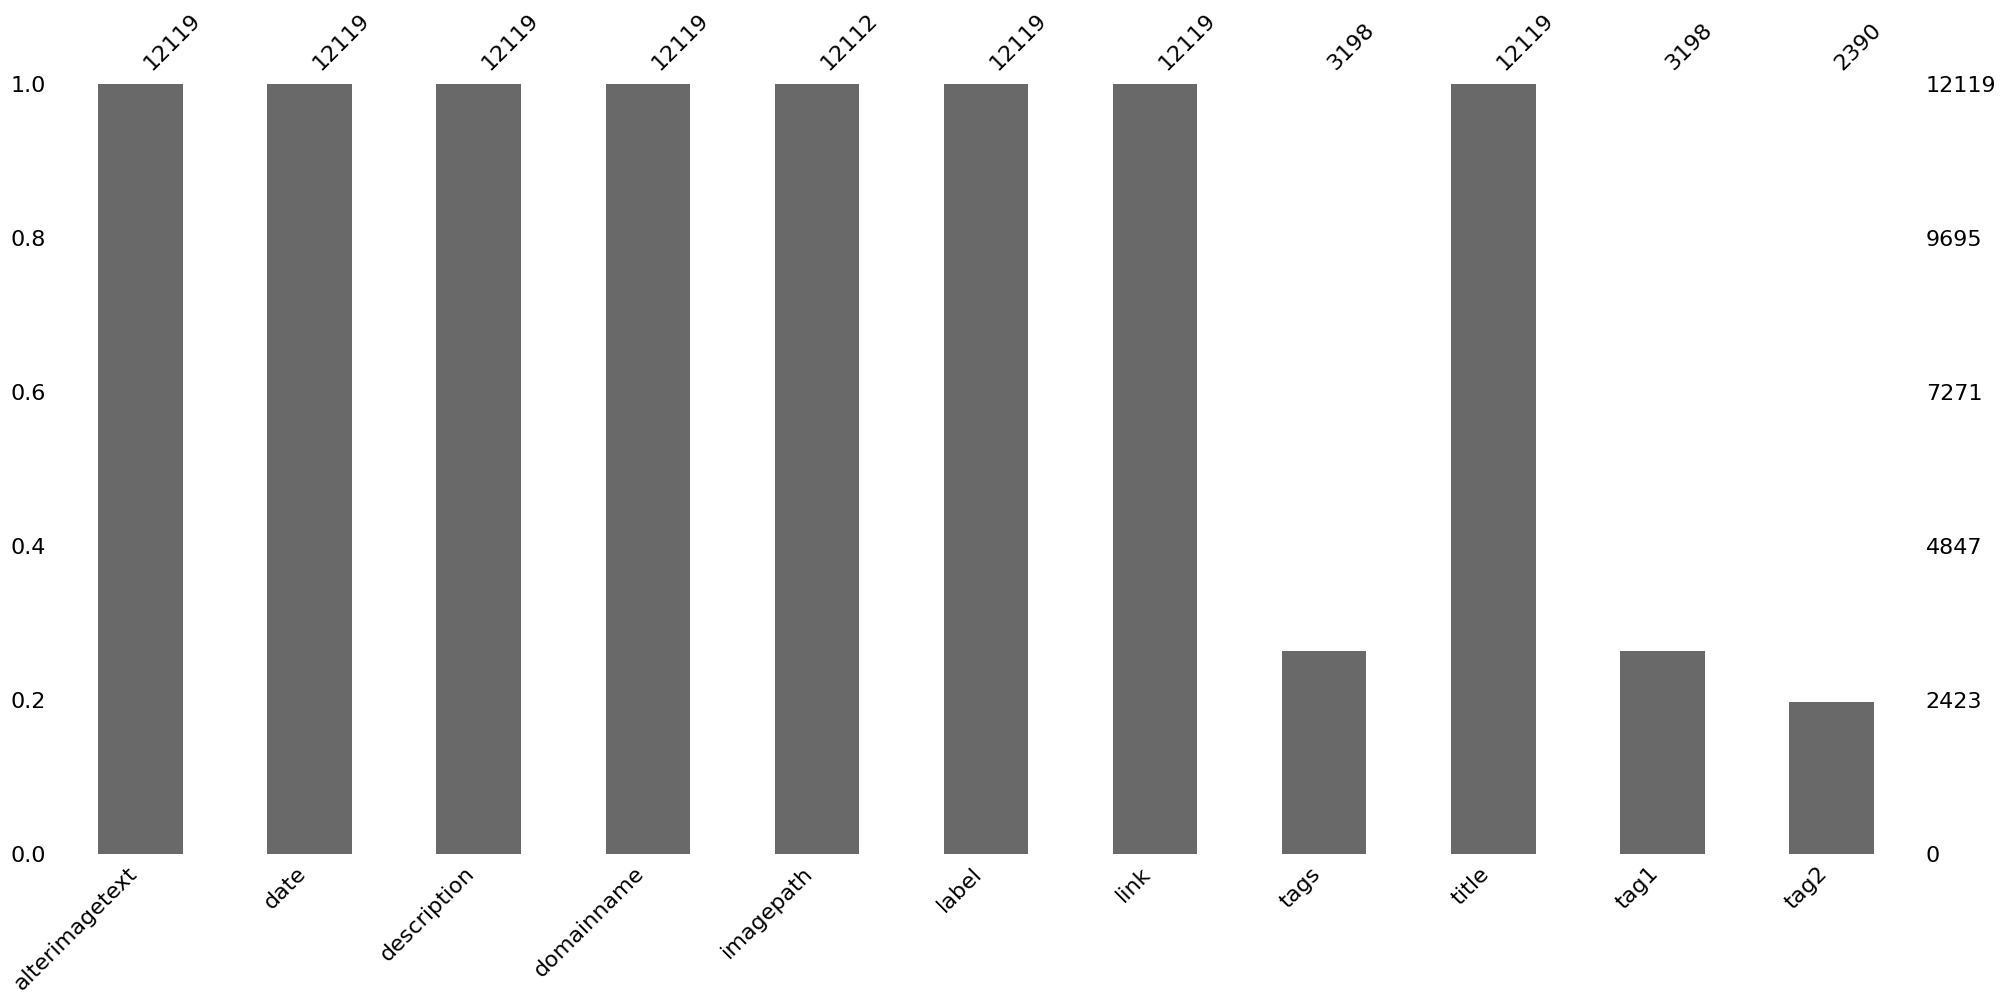

In [43]:
msno.bar(thn_df);

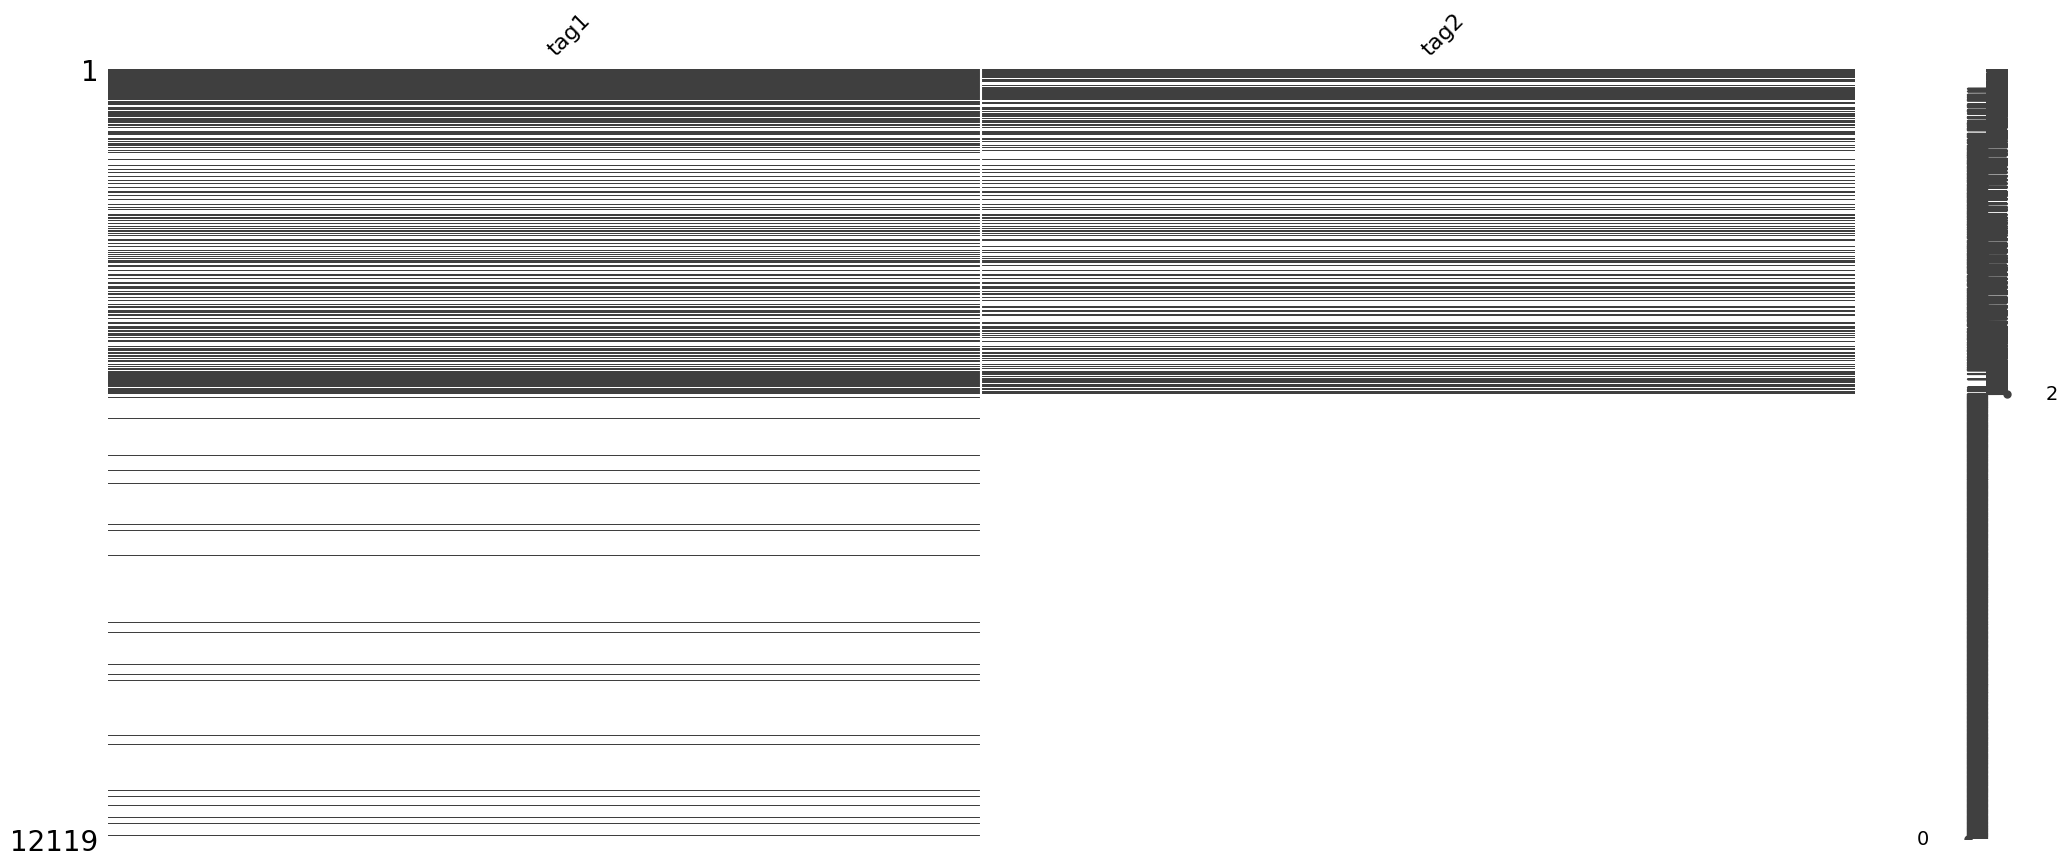

In [44]:
## Plot nullity matrix of thn
fig = msno.matrix(thn_df[['tag1', 'tag2']])
# When data is present, the plot is shaded in grey (or your colour of choice), and 
# when it is absent the plot is displayed in white.

In [45]:
thn_df.columns

Index(['alterimagetext', 'date', 'description', 'domainname', 'imagepath',
       'label', 'link', 'tags', 'title', 'tag1', 'tag2'],
      dtype='object')

In [46]:
thn_df[['alterimagetext', 'title']][0:5]

,alterimagetext,title
0,LockBit Ransomware Group Resurfaces After Law ...,LockBit Ransomware Group Resurfaces After Law ...
1,Cybersecurity for Healthcare—Diagnosing the Th...,Cybersecurity for Healthcare—Diagnosing the Th...
2,How to Achieve the Best Risk-Based Alerting (B...,How to Achieve the Best Risk-Based Alerting (B...
3,LockBit Ransomware Operation Shut Down; Crimin...,LockBit Ransomware Operation Shut Down; Crimin...
4,How Businesses Can Safeguard Their Communicati...,How Businesses Can Safeguard Their Communicati...


In [47]:
# Check if the 'alterimagetext' and 'title' columns are the same
thn_df['same_contents'] = thn_df['alterimagetext'] == thn_df['title']

# Print or further process the resulting DataFrame
thn_df[['same_contents', 'alterimagetext', 'title']].head()

,same_contents,alterimagetext,title
0,True,LockBit Ransomware Group Resurfaces After Law ...,LockBit Ransomware Group Resurfaces After Law ...
1,True,Cybersecurity for Healthcare—Diagnosing the Th...,Cybersecurity for Healthcare—Diagnosing the Th...
2,True,How to Achieve the Best Risk-Based Alerting (B...,How to Achieve the Best Risk-Based Alerting (B...
3,True,LockBit Ransomware Operation Shut Down; Crimin...,LockBit Ransomware Operation Shut Down; Crimin...
4,True,How Businesses Can Safeguard Their Communicati...,How Businesses Can Safeguard Their Communicati...


In [48]:
thn_df['same_contents'].value_counts()

same_contents
True     12007
False      112
Name: count, dtype: int64

In [49]:
# Convert the string column to a list
column_values = thn_df[thn_df['same_contents'] == False][['alterimagetext', 'title']].values.tolist()
column_values

[['Offensive and Defensive AI: Let’s Chat(GPT) About It',
  "Offensive and Defensive AI: Let's Chat(GPT) About It"],
 ['Offensive and Defensive AI: Let’s Chat(GPT) About It',
  "Offensive and Defensive AI: Let's Chat(GPT) About It"],
 ['French Electricity Provider Fined for Storing Users’ Passwords with Weak MD5 Algorithm',
  "French Electricity Provider Fined for Storing Users' Passwords with Weak MD5 Algorithm"],
 ['IT Firm Manager Arrested in the Biggest Data Breach Case of Ecuador’s History',
  "IT Firm Manager Arrested in the Biggest Data Breach Case of Ecuador's History"],
 ['XKCD Forum Hacked – Over 562,000 Users’ Account Details Leaked',
  "XKCD Forum Hacked – Over 562,000 Users' Account Details Leaked"],
 ['Iranian Hackers Compromised a U.S. Federal Agency’s Network Using Log4Shell Exploit',
  "Iranian Hackers Compromised a U.S. Federal Agency's Network Using Log4Shell Exploit"],
 ['How to Analyze Malware’s Network Traffic in A Sandbox',
  "How to Analyze Malware's Network Tra

In [50]:
thn_df.columns

Index(['alterimagetext', 'date', 'description', 'domainname', 'imagepath',
       'label', 'link', 'tags', 'title', 'tag1', 'tag2', 'same_contents'],
      dtype='object')

In [51]:
thn_df[['link', 'tags', 'title']].values.tolist()

[['https://thehackernews.com/2024/02/lockbit-ransomware-group-resurfaces.html',
  'Dark Web / Threat Intelligence',
  'LockBit Ransomware Group Resurfaces After Law Enforcement Takedown'],
 ['https://thehackernews.com/2024/02/cybersecurity-for-healthcarediagnosing.html',
  'Endpoint Security / Healthcare',
  'Cybersecurity for Healthcare—Diagnosing the Threat Landscape and Prescribing Solutions for Recovery'],
 ['https://thehackernews.com/2024/02/bye-bye-siem-hello-risk-based-alerting.html',
  'Network Detection and Response',
  'How to Achieve the Best Risk-Based Alerting (Bye-Bye SIEM)'],
 ['https://thehackernews.com/2024/02/lockbit-ransomware-operation-shut-down.html',
  'Ransomware / Data Protection',
  'LockBit Ransomware Operation Shut Down; Criminals Arrested; Decryption Keys Released'],
 ['https://thehackernews.com/2024/02/how-businesses-can-safeguard-their.html',
  'Cybersecurity / Risk Mitigation',
  'How Businesses Can Safeguard Their Communication Channels Against Hackers']

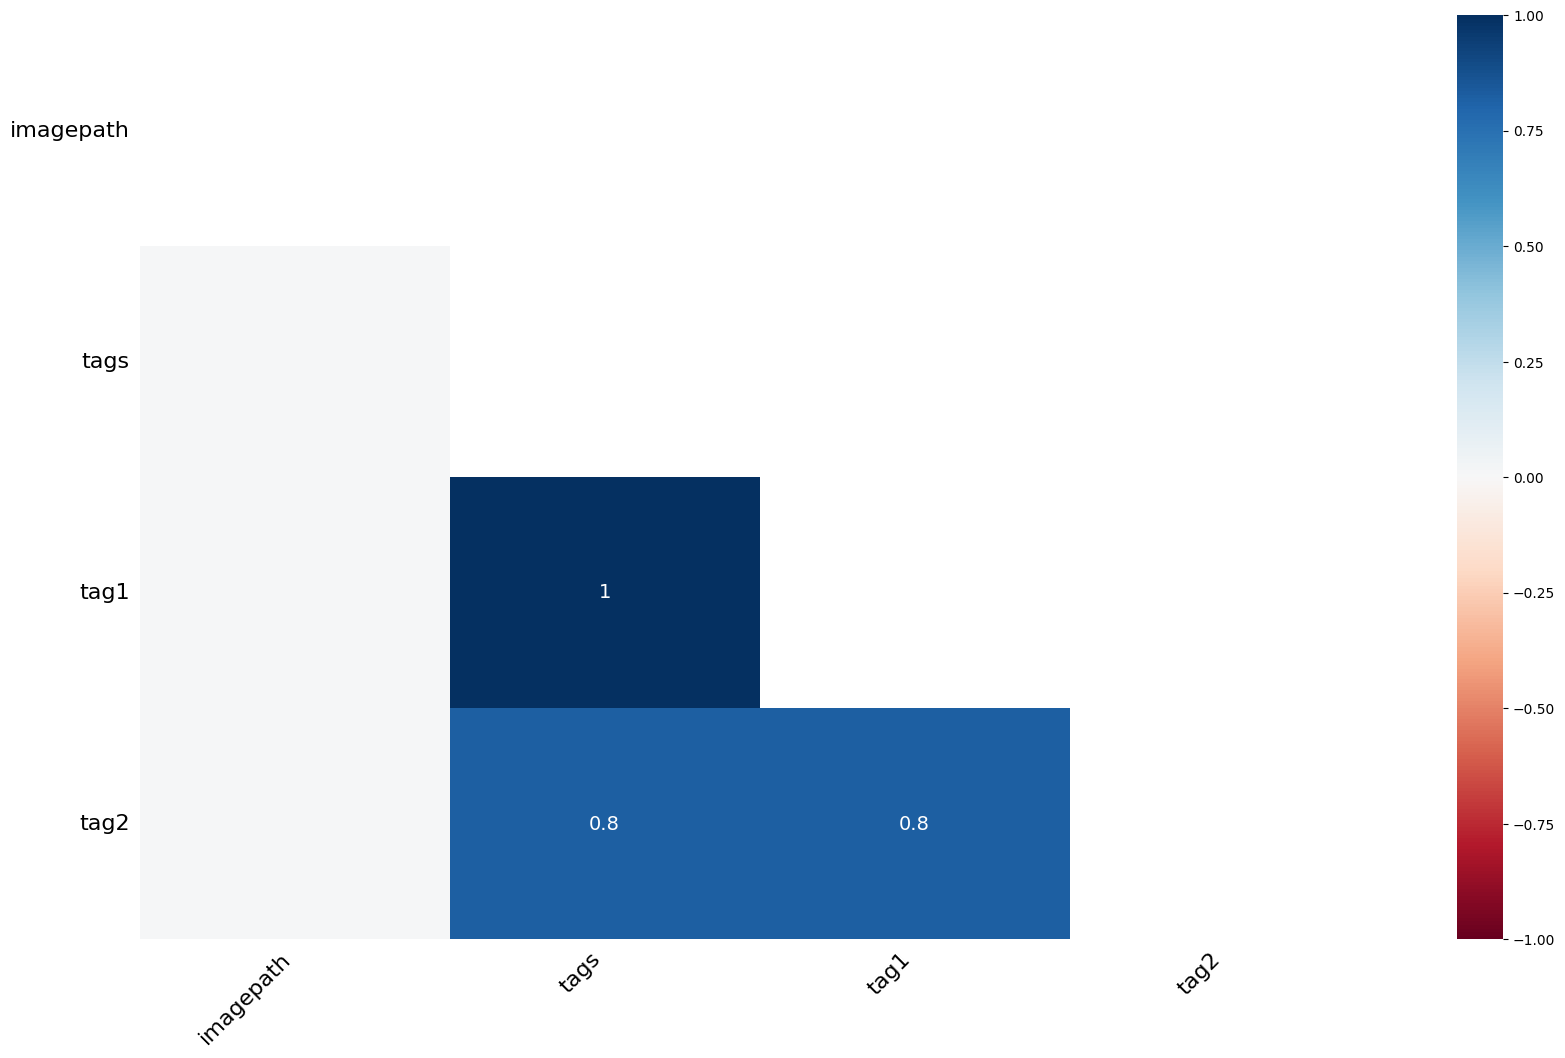

In [52]:
# Finding correlations in your data
# The heatmap is used to identify correlations of the nullity between each of the different columns.
# Plot missingness heatmap of lieux 
msno.heatmap(thn_df);

In [53]:
thn_df.head()

,alterimagetext,date,description,domainname,imagepath,label,link,tags,title,tag1,tag2,same_contents
0,LockBit Ransomware Group Resurfaces After Law ...,2024-02-26,The threat actors behind the LockBit ransomwa...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/lockbit-rans...,Dark Web / Threat Intelligence,LockBit Ransomware Group Resurfaces After Law ...,Dark Web,Threat Intelligence,True
1,Cybersecurity for Healthcare—Diagnosing the Th...,2024-02-21,"On Thanksgiving Day 2023, while many American...",thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/cybersecurit...,Endpoint Security / Healthcare,Cybersecurity for Healthcare—Diagnosing the Th...,Endpoint Security,Healthcare,True
2,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True
3,LockBit Ransomware Operation Shut Down; Crimin...,2024-02-20,The U.K. National Crime Agency (NCA) on Tuesd...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/lockbit-rans...,Ransomware / Data Protection,LockBit Ransomware Operation Shut Down; Crimin...,Ransomware,Data Protection,True
4,How Businesses Can Safeguard Their Communicati...,2024-02-17,Efficient communication is a cornerstone of b...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/how-business...,Cybersecurity / Risk Mitigation,How Businesses Can Safeguard Their Communicati...,Cybersecurity,Risk Mitigation,True


In [54]:
thn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  12119 non-null  object        
 1   date            12119 non-null  datetime64[ns]
 2   description     12119 non-null  object        
 3   domainname      12119 non-null  object        
 4   imagepath       12112 non-null  object        
 5   label           12119 non-null  category      
 6   link            12119 non-null  object        
 7   tags            3198 non-null   object        
 8   title           12119 non-null  object        
 9   tag1            3198 non-null   object        
 10  tag2            2390 non-null   object        
 11  same_contents   12119 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(9)
memory usage: 970.8+ KB


In [55]:
thn_df.describe()

,date
count,12119
mean,2020-03-04 18:15:17.897516288
min,2013-12-10 00:00:00
25%,2017-05-02 00:00:00
50%,2021-02-26 00:00:00
75%,2023-01-17 00:00:00
max,2024-02-28 00:00:00


In [56]:
# Print original DataFrame informations
print("DataFrame original :")
print(thn_df.info())
 
# Identification des doublons
thn_duplicates = thn_df[thn_df.duplicated()]
print("Doublons identifiés :")
print(thn_duplicates.info())
 


DataFrame original :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  12119 non-null  object        
 1   date            12119 non-null  datetime64[ns]
 2   description     12119 non-null  object        
 3   domainname      12119 non-null  object        
 4   imagepath       12112 non-null  object        
 5   label           12119 non-null  category      
 6   link            12119 non-null  object        
 7   tags            3198 non-null   object        
 8   title           12119 non-null  object        
 9   tag1            3198 non-null   object        
 10  tag2            2390 non-null   object        
 11  same_contents   12119 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(9)
memory usage: 970.8+ KB
None
Doublons identifiés :
<class 'pandas.core.frame.DataFr

In [57]:
thn_duplicates.head()


,alterimagetext,date,description,domainname,imagepath,label,link,tags,title,tag1,tag2,same_contents
63,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,home,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True
76,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,Cyber Attack,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True
91,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,data breach,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True
108,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,home,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True
121,How to Achieve the Best Risk-Based Alerting (B...,2024-02-19,Did you know that Network Detection and Respo...,thehackernews.com,https://blogger.googleusercontent.com/img/b/R2...,Vulnerability,https://thehackernews.com/2024/02/bye-bye-siem...,Network Detection and Response,How to Achieve the Best Risk-Based Alerting (B...,Network Detection and Response,None,True


In [58]:
# Drop duplicate rows based on all columns
thn_df_dro = thn_df.drop_duplicates()

print("DataFrame sans doublons :")
thn_df_dro.info()

DataFrame sans doublons :
<class 'pandas.core.frame.DataFrame'>
Index: 11475 entries, 0 to 12118
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  11475 non-null  object        
 1   date            11475 non-null  datetime64[ns]
 2   description     11475 non-null  object        
 3   domainname      11475 non-null  object        
 4   imagepath       11468 non-null  object        
 5   label           11475 non-null  category      
 6   link            11475 non-null  object        
 7   tags            2554 non-null   object        
 8   title           11475 non-null  object        
 9   tag1            2554 non-null   object        
 10  tag2            2390 non-null   object        
 11  same_contents   11475 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(9)
memory usage: 1008.7+ KB


In [59]:
# To remove rows where at least one value is NaN
thn_df_dro = thn_df.dropna()

In [60]:
print("DataFrame without NaN :")
thn_df_dro.info()

DataFrame without NaN :
<class 'pandas.core.frame.DataFrame'>
Index: 2390 entries, 0 to 5114
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   alterimagetext  2390 non-null   object        
 1   date            2390 non-null   datetime64[ns]
 2   description     2390 non-null   object        
 3   domainname      2390 non-null   object        
 4   imagepath       2390 non-null   object        
 5   label           2390 non-null   category      
 6   link            2390 non-null   object        
 7   tags            2390 non-null   object        
 8   title           2390 non-null   object        
 9   tag1            2390 non-null   object        
 10  tag2            2390 non-null   object        
 11  same_contents   2390 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(9)
memory usage: 210.3+ KB


In [66]:
# Print a frequency table of labels
thn_df_dro['label'].value_counts(normalize=True, dropna=False).sort_index().round(2)

label
Cyber Attack     0.07
Vulnerability    0.13
data breach      0.04
home             0.76
Name: proportion, dtype: float64

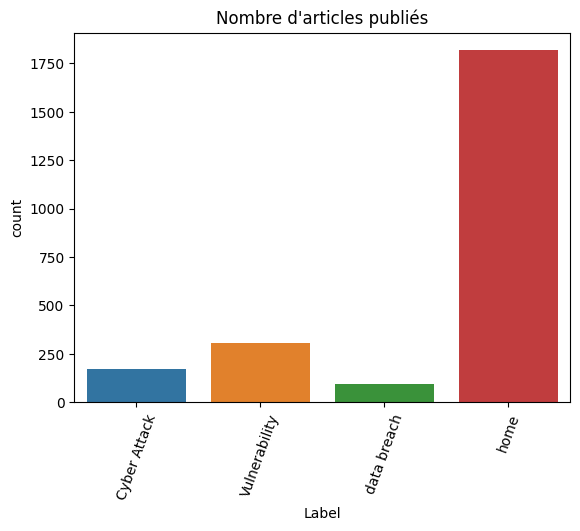

In [70]:
# Create count plot with Labels on the x-axis
sns.countplot(x=thn_df_dro['label'])
plt.xticks(rotation=70)
plt.xlabel("Label")
plt.title("Nombre d'articles publiés")
# Show plot
plt.show()

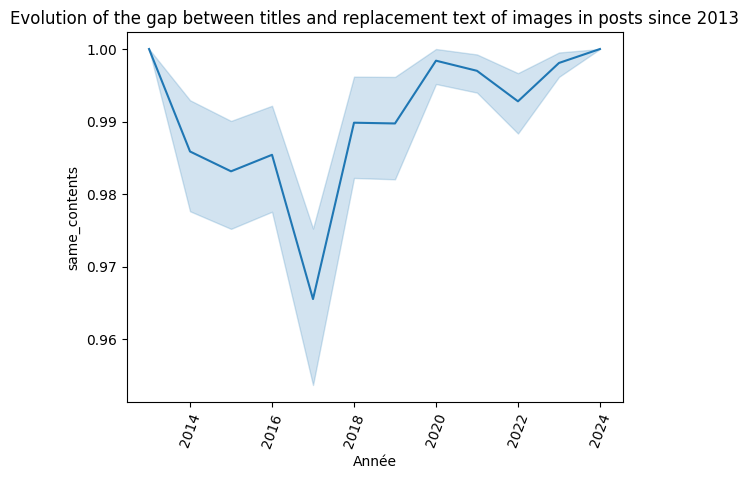

In [77]:
# Evolution de l'écart entre les titres et les texte de remplacement des images dans les posts depuis 2013
sns.lineplot( y=thn_df["same_contents"], x=thn_df["date"].dt.year)
plt.xticks(rotation=70)
plt.xlabel("Année")
plt.title("Evolution of the gap between titles and replacement text of images in posts since 2013")
# Show plot
plt.show();

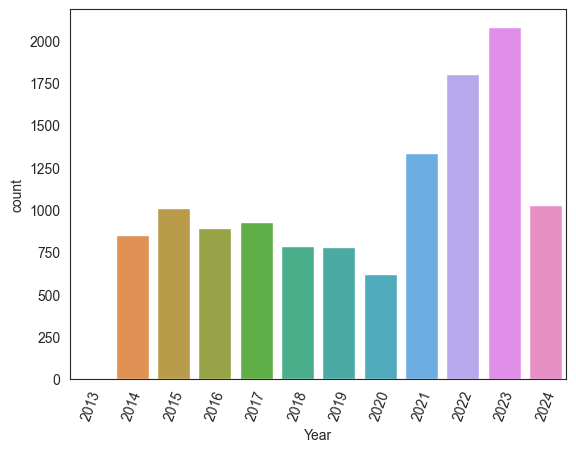

In [98]:
#year=thn_df["date"].dt.year
sns.countplot( x=thn_df["date"].dt.year)
plt.xticks(rotation=70)
plt.xlabel("Year")
#plt.title("Number of posts per year")
# Show plot
#plt.show()
# Save fig
plt.savefig('thn_pots_year.jpg');

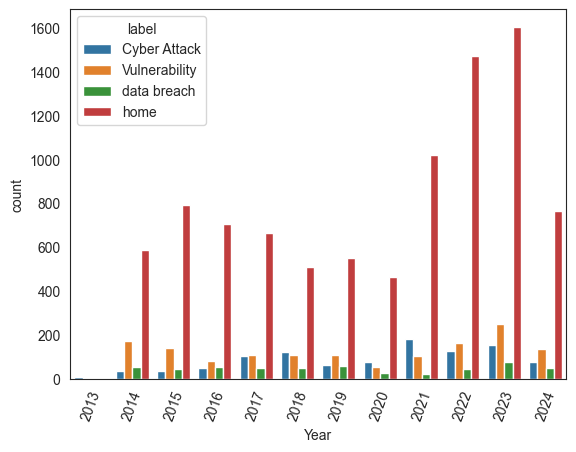

In [99]:
#year=thn_df["date"].dt.year
sns.countplot( x=thn_df["date"].dt.year, hue=thn_df['label'])
plt.xticks(rotation=70)
plt.xlabel("Year")
#plt.title("Number of posts per year")
# Show plot
#plt.show()
# Save fig
plt.savefig('thn_pots_label_year.jpg');

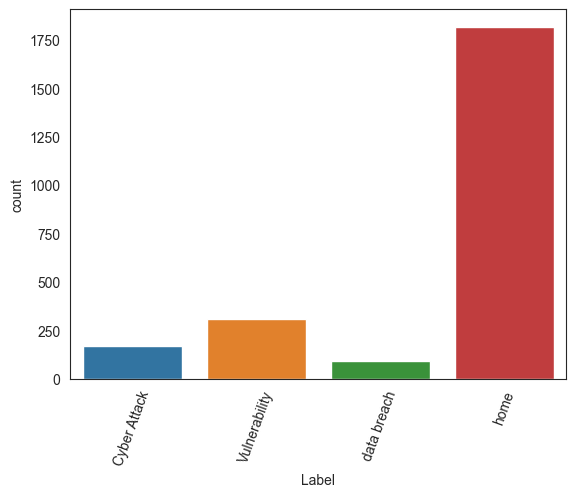

In [95]:
#year=thn_df["date"].dt.year
sns.countplot(x=thn_df_dro["label"])
plt.xticks(rotation=70)
plt.xlabel("Label")
#plt.title("Nombre de posts selon le label")
# Show plot
#plt.show()
# Save fig
plt.savefig('thn_pots_label.jpg');

In [81]:
thn_df.shape

(12119, 12)

In [82]:
thn_df_dro.shape

(2390, 15)

In [83]:
thn_df.columns

Index(['alterimagetext', 'date', 'description', 'domainname', 'imagepath',
       'label', 'link', 'tags', 'title', 'tag1', 'tag2', 'same_contents'],
      dtype='object')

In [84]:
thn_df_dro.columns

Index(['alterimagetext', 'date', 'description', 'domainname', 'imagepath',
       'label', 'link', 'tags', 'title', 'tag1', 'tag2', 'same_contents',
       'domain_name', 'domain_Imgname', 'year'],
      dtype='object')

In [85]:
pd.options.mode.copy_on_write = True
thn_df['Long_titre'] = thn_df['title'].apply(lambda t: len(t))

In [86]:
len(thn_df['title'][0])

66

In [87]:
thn_df['Long_titre'][0]

66

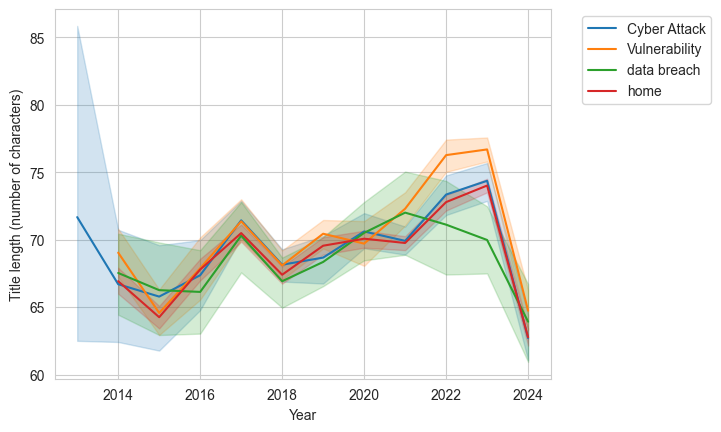

In [100]:
sns.set_style("whitegrid")
ax = sns.lineplot(x=thn_df['date'].dt.year, y=thn_df['Long_titre'], hue=thn_df["label"] )#, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Title length (number of characters)")
#plt.title("Evolution of the length of post titles over the last 10 years")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#plt.show()
# Save fig
plt.savefig('thn_titles_length.jpg');

In [89]:
thn_df['Long_descr'] = thn_df['description'].apply(lambda t: len(t))

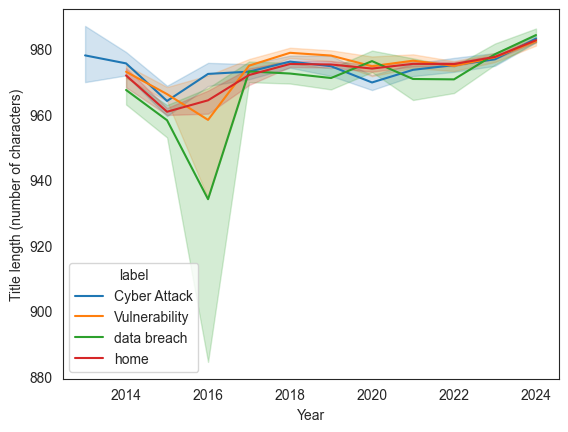

In [102]:
sns.set_style("white")
ax = sns.lineplot(x=thn_df['date'].dt.year, y=thn_df['Long_descr'], hue=thn_df["label"] )#, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Title length (number of characters)")
#plt.title("Evolution of the length of post titles over the last 10 years")
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.show()
# Save fig
plt.savefig('thn_pots_descr_length.jpg');

In [ ]:
## Calculating the frequency of words in a corpus and creating a word cloud

In [103]:
# Compilons toutes les descriptions de thn_df_dro dans une variable text de type string.
# Définir la variable text
text = ""
for comment in thn_df_dro.description : 
    text += comment

# Initialisation de la variable des mots vides
stop_words = set(stopwords.words('english'))
# Affichage des stop_words
print(stop_words)

{'of', 'are', 'again', 'any', "that'll", "hasn't", 'there', 'them', 't', 'few', "mustn't", 'didn', 'ain', 'o', "should've", 'i', 'me', 'when', 'down', 'from', 's', "wasn't", 'each', 'for', 'own', 'only', 'd', 'until', 'these', 'so', 'itself', 'should', 'other', 'hasn', 'had', 'your', 'was', 'aren', 'haven', 'be', "you'd", 'himself', "don't", 'he', "didn't", 'don', 'yours', 'because', 'than', "mightn't", 'once', 'against', 'same', "shan't", 'hadn', "it's", 'does', 're', "hadn't", "needn't", 'will', 'an', 'but', 'my', 'further', 'after', 'being', 'in', 'or', 'before', 'ma', 'now', 'a', 'm', 'his', 'between', 'won', 'doing', 'where', "you're", 'some', 'shouldn', 'you', "isn't", 'such', 'ours', "haven't", 'those', 'as', 'who', 'more', 'isn', 'our', 'by', 'yourself', 'wasn', 'having', 'mustn', 'mightn', 'on', 'weren', 'very', "won't", 'theirs', 'here', 'out', 'if', 'him', 'into', 'her', 'needn', 'wouldn', 'which', 'through', "you've", 'did', 'do', 'ourselves', 'during', 'we', 'nor', 'about'

In [104]:
# Séparer df en données positives et négatives
df_data_breach = thn_df_dro[thn_df_dro.label == 'data breach']
df_cyber_attack = thn_df_dro[thn_df_dro.label == 'Cyber Attack']
df_vulnerability = thn_df_dro[thn_df_dro.label == 'Vulnerability']
df_home = thn_df_dro[thn_df_dro.label == 'home']


In [105]:
thn_df["label"].unique()

['data breach', 'Cyber Attack', 'home', 'Vulnerability']
Categories (4, object): ['Cyber Attack', 'Vulnerability', 'data breach', 'home']

In [106]:
# Définition des variables text
text_data_breach = ""
for comment in df_data_breach.description : 
    text_data_breach += comment
    
text_cyber_attack = ""
for comment in df_cyber_attack.description : 
    text_cyber_attack += comment
    
text_vulnerability = ""
for comment in df_vulnerability.description : 
    text_vulnerability += comment
    
text_home = ""
for comment in df_home.description : 
    text_home += comment

In [107]:
# Définition du calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)


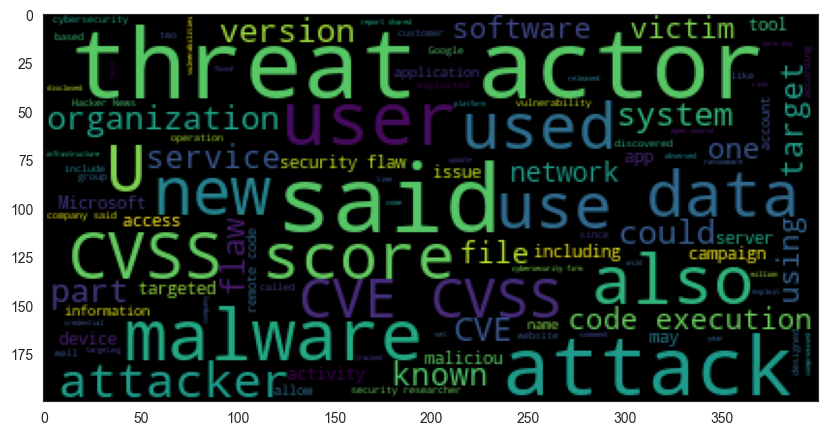

In [108]:
# Générer et afficher le nuage de mots

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

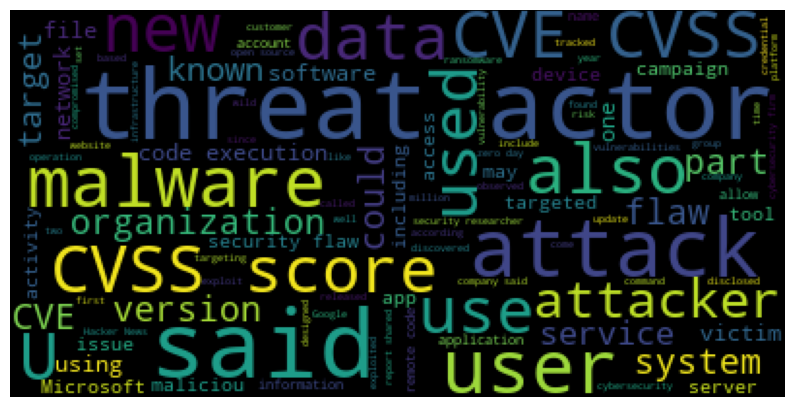

In [109]:
# Générer et afficher le nuage de mots

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.savefig('thn.jpg')

afficher le nuage de mots en lui appliquant un masque

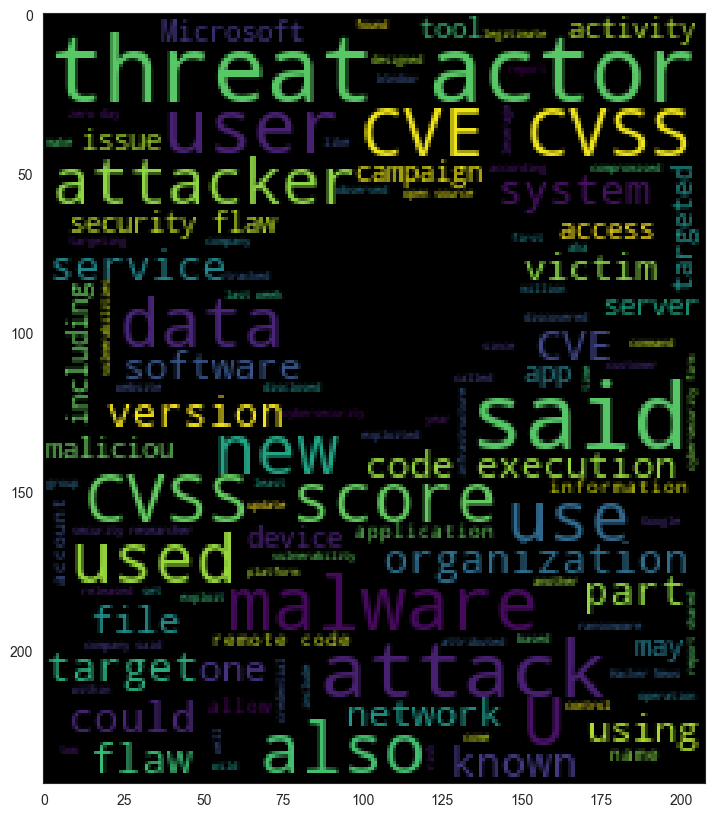

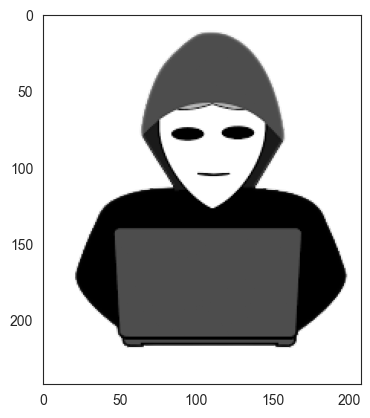

In [110]:
def plot_word_cloud(text, masque, background_color = "black") :
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, stopwords=stop_words, mask = mask_coloring, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(text, "HackerBehindPC-removebg-preview.png")

# Code d'affichage du masque
import matplotlib.image as mpimg
img = mpimg.imread("HackerBehindPC-removebg-preview.png")
plt.imshow(img)
plt.show()

In [118]:
def plot_word_cloud(text, masque, background_color = "black"):
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, 
                   stopwords=stop_words, mask = mask_coloring, 
                   max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.axis=False
    #plt.show()
    # Save fig
    plt.savefig('thn_word_cloud.jpg');

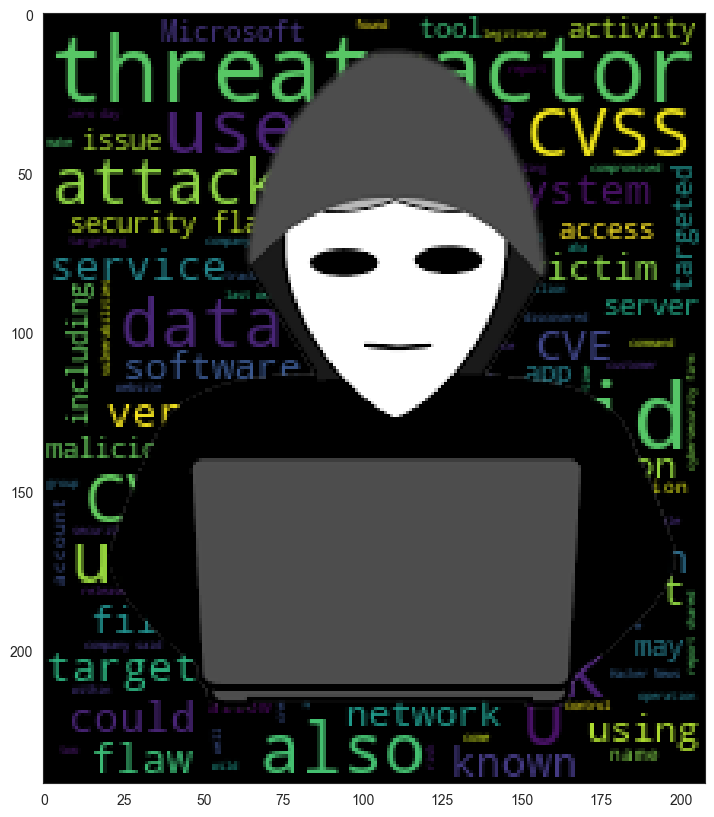

In [119]:
plot_word_cloud(text, "HackerBehindPC-removebg-preview.png")

# Code d'affichage du masque
img = mpimg.imread("HackerBehindPC-removebg-preview.png")
plt.imshow(img)
plt.show()

Most COmmon WORD

In [114]:

# Tokenize the article: tokens
tokens = word_tokenize(text)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 20244), ('the', 19350), ('.', 11958), ('to', 11019), ('a', 9677), ('and', 9121), ('of', 8406), ('in', 7315), ('that', 4333), ('(', 3686)]


Now, we are going to clean up text for better NLP results. You'll need to remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on our cleaned text.

In [115]:

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stop_words]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('security', 2413), ('said', 2312), ('threat', 1920), ('attack', 1863), ('actor', 1753), ('vulnerability', 1446), ('data', 1285), ('malware', 1245), ('flaw', 1219), ('access', 1064)]


In [116]:
def lemmatized_list(text):
    # Tokenize the article: tokens
    tokens = word_tokenize(text)
    
    # Convert the tokens into lowercase: lower_tokens
    lower_tokens = [t.lower() for t in tokens]
    
    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    
    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in stop_words]
    
    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Lemmatize all tokens into a new list: lemmatized
    lemmatized_text = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    return lemmatized_text

## Visualisation des mots Les plus fréquemment utilisés dans les posts à l'aide d'un un histogramme

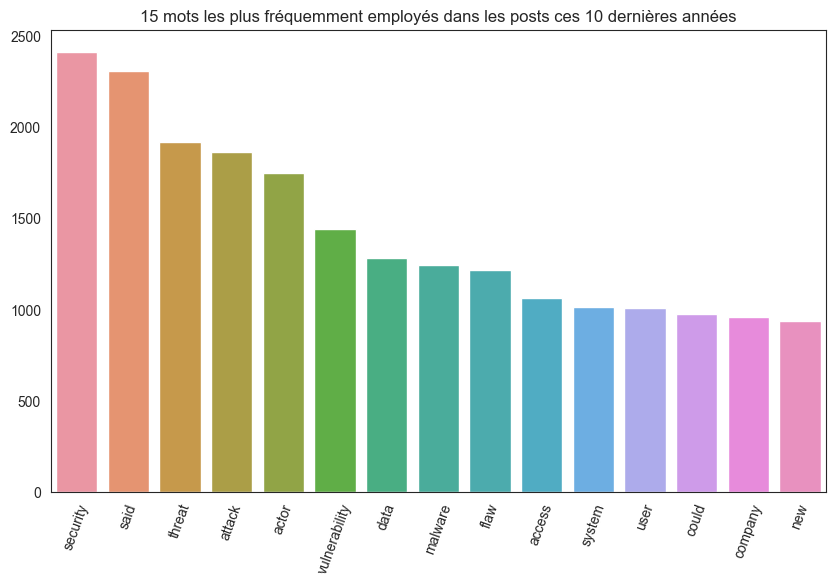

In [120]:
chaine = ' '.join(i.lower() for i in lemmatized)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.xticks(rotation=70)
plt.title('15 mots les plus fréquemment employés dans les posts ces 10 dernières années')

#plt.show()
# Save fig
plt.savefig('thn_word_count.jpg');

In [121]:
lemmatized_data_breach = lemmatized_list(text_data_breach)
    
lemmatized__cyber_attack = lemmatized_list(text_cyber_attack)
    
lemmatized_vulnerability = lemmatized_list(text_vulnerability)
    
lemmatized_home = lemmatized_list(text_home)

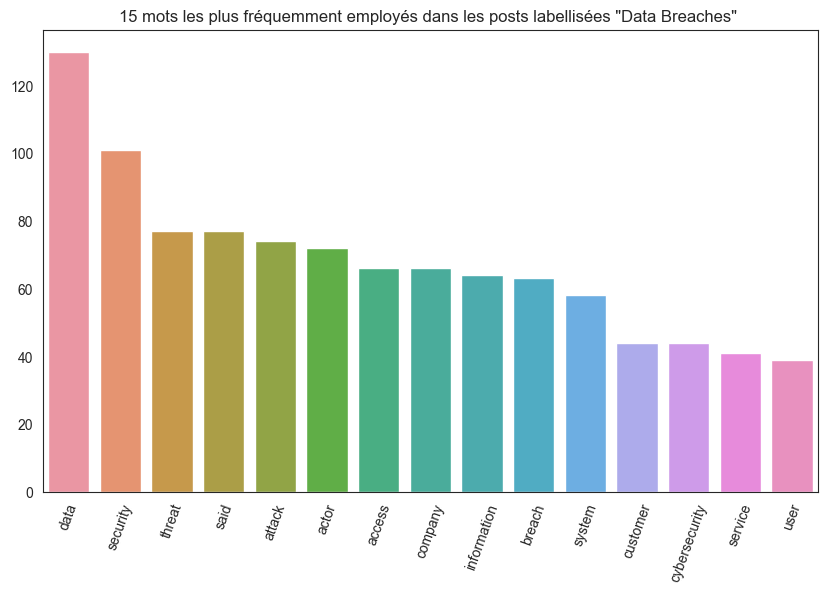

In [122]:
chaine = ' '.join(i.lower() for i in lemmatized_data_breach)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.xticks(rotation=70)
plt.title('15 mots les plus fréquemment employés dans les posts labellisées "Data Breaches" ');

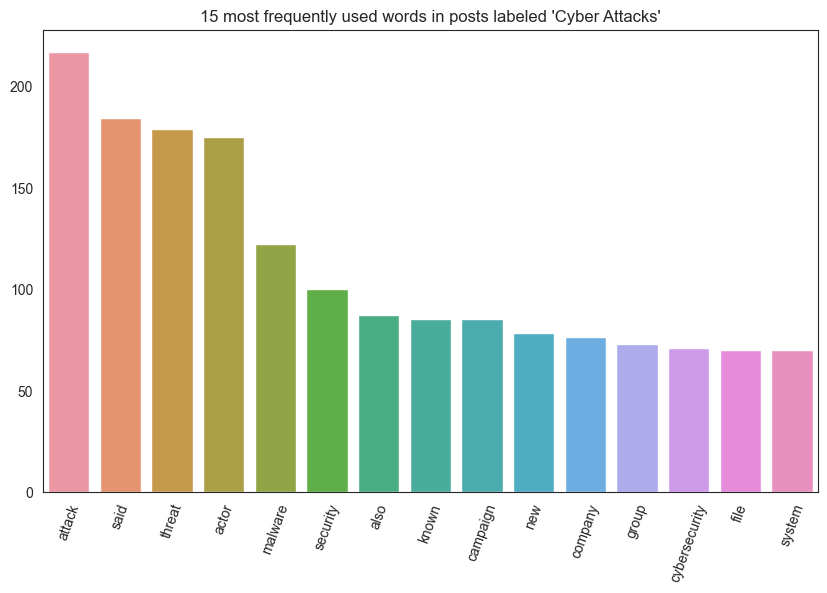

In [123]:
chaine = ' '.join(i.lower() for i in lemmatized__cyber_attack)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Cyber Attacks'");

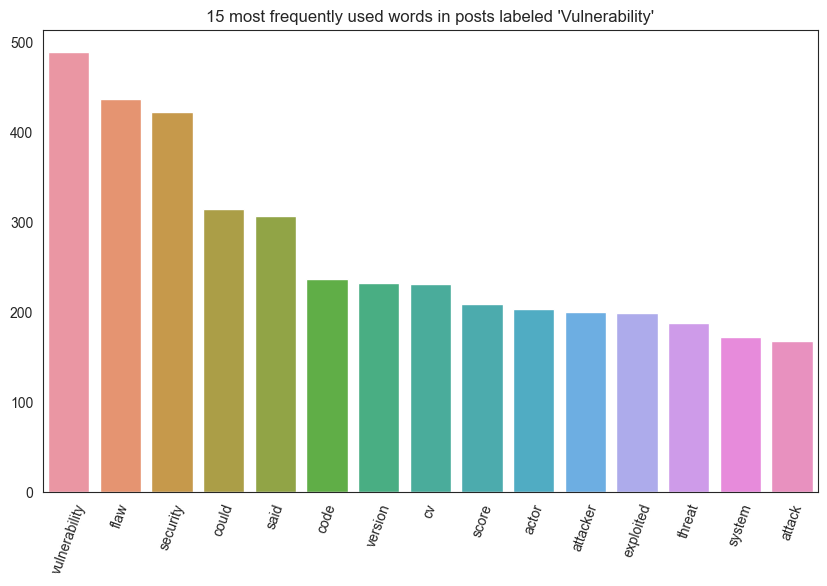

In [124]:
chaine = ' '.join(i.lower() for i in lemmatized_vulnerability)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Vulnerability'");

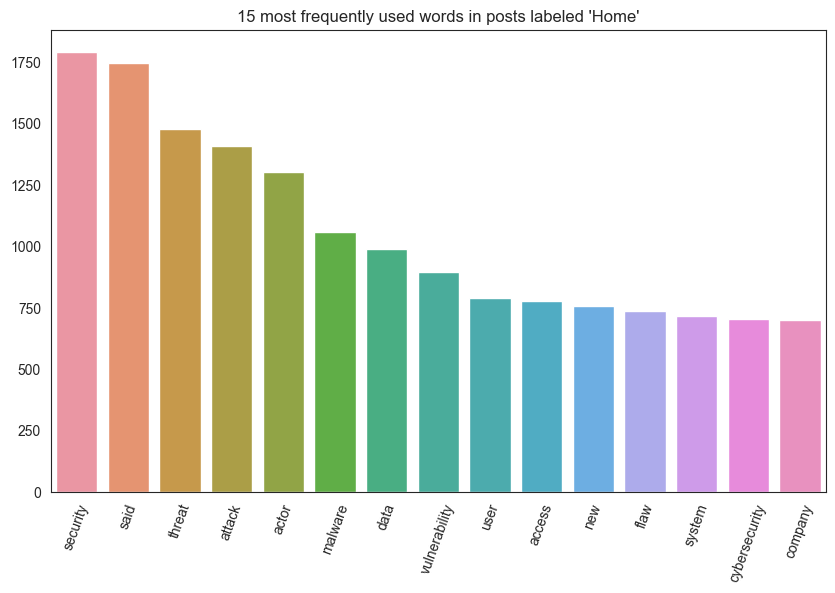

In [125]:
chaine = ' '.join(i.lower() for i in lemmatized_home)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Home'");

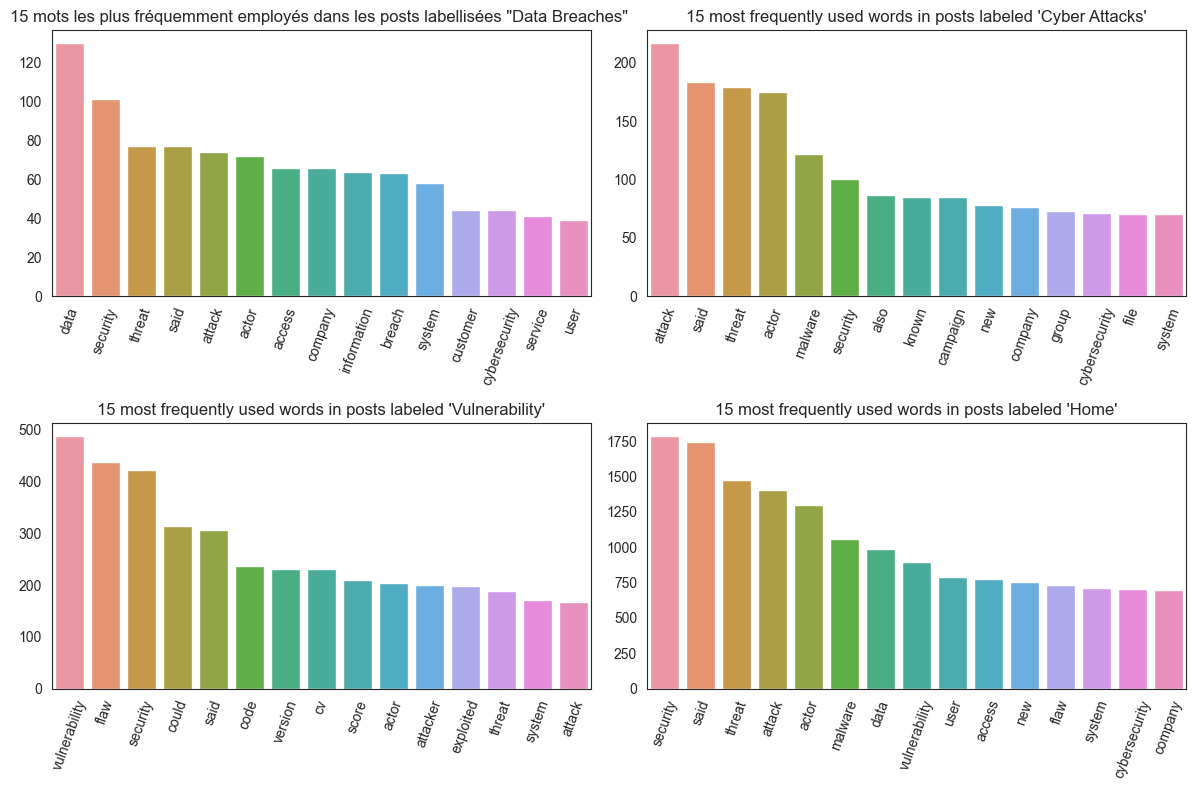

In [126]:
chaine_home = ' '.join(i.lower() for i in lemmatized_home)
dico_home = Counter(chaine_home.split())
mots_home = [m[0] for m in dico_home.most_common(15)]
freq_home = [m[1] for m in dico_home.most_common(15)]

chaine_vulnerability = ' '.join(i.lower() for i in lemmatized_vulnerability)
dico_vulnerability = Counter(chaine_vulnerability.split())
mots_vulnerability = [m[0] for m in dico_vulnerability.most_common(15)]
freq_vulnerability = [m[1] for m in dico_vulnerability.most_common(15)]

chaine_cyber_attack = ' '.join(i.lower() for i in lemmatized__cyber_attack)
dico_cyber_attack = Counter(chaine_cyber_attack.split())
mots_cyber_attack = [m[0] for m in dico_cyber_attack.most_common(15)]
freq_cyber_attack = [m[1] for m in dico_cyber_attack.most_common(15)]

chaine_data_breach = ' '.join(i.lower() for i in lemmatized_data_breach)
dico_data_breach = Counter(chaine_data_breach.split())
mots_data_breach = [m[0] for m in dico_data_breach.most_common(15)]
freq_data_breach = [m[1] for m in dico_data_breach.most_common(15)]


# Créez une nouvelle figure avec 2 lignes et 2 colonnes
plt.figure(figsize=(12, 8))

# Première image (à remplacer par votre propre image)
plt.subplot(2, 2, 1)
sns.barplot(x=mots_data_breach, y=freq_data_breach)
plt.xticks(rotation=70)
plt.title('15 mots les plus fréquemment employés dans les posts labellisées "Data Breaches" ');

# Deuxième image (à remplacer par votre propre image)
plt.subplot(2, 2, 2)
sns.barplot(x=mots_cyber_attack, y=freq_cyber_attack)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Cyber Attacks'");

# Troisième image (à remplacer par votre propre image)
plt.subplot(2, 2, 3)
sns.barplot(x=mots_vulnerability, y=freq_vulnerability)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Vulnerability'");

# Quatrième image (à remplacer par votre propre image)
plt.subplot(2, 2, 4)
sns.barplot(x=mots_home, y=freq_home)
plt.xticks(rotation=70)
plt.title( "15 most frequently used words in posts labeled 'Home'");

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez la figure
#plt.show()
# Save fig
plt.savefig('thn_most_used_word_labels.jpg');

In [ ]:
plot_word_cloud(text_vulnerability, "vulnerability-300x171.jpg")
# Code d'affichage du masque
img = mpimg.imread("vulnerability-300x171.jpg")
plt.imshow(img)
plt.show()

In [ ]:
plot_word_cloud(text_home, "the-hacker-news-removebg-preview.png")
# Code d'affichage du masque
img = mpimg.imread("the-hacker-news-removebg-preview.png")
plt.imshow(img)
plt.show()

In [ ]:
plot_word_cloud(text_cyber_attack, "20210127PHT96502_original-1536x1024.jpg")

In [ ]:
plot_word_cloud(text_data_breach, "iron.jpg")

## Entités nommées

Finding the named entities in the text description

In [127]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(text)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE LockBit/NNP)
(NE TOR/NNP)
(NE LockBit/NNP)
(NE PHP/NNP)
(NE PHP/NNP)
(NE PHP/NNP)
(NE U.S./NNP)
(NE Care/NNP)
(NE Sophisticated/JJ)
(NE NCA/NNP)
(NE LockBit/NNP)
(NE LockBit/NNP)
(NE LockBit/NNP)
(NE Poland/NNP)
(NE Ukraine/NNP)
(NE U.S./NNP)
(NE Russian/JJ)
(NE LockBit/NNP)
(NE Artur/NNP Sungatov/NNP)
(NE Ivan/NNP Gennadievich/NNP Kondratiev/NNP)
(NE LockBit/NNP)
(NE U.S./NNP)
(NE Use/NNP)
(NE U.S./NNP Cybersecurity/NNP)
(NE Infrastructure/NNP Security/NNP Agency/NNP)
(NE CISA/NNP)
(NE VPN/NNP)
(NE Analysis/NNP Center/NNP)
(NE SharePoint/NNP)
(NE FinServ/NNP Threat/NNP Landscape/NNP)
(NE Midnight/NNP Blizzard/NNP)
(NE SaaS/NNP)
(NE SaaS/NNP)
(NE SaaS/NNP)
(NE Common/JJ)
(NE Midnight/NNP Blizzard/NNP)
(NE OAuth/NNP)
(NE Okta/NNP)
(NE SaaS/NNP)
(NE Microsoft/NNP Midnight/NNP Blizzard/NNP Breach/NNP Microsoft/NNP)
(NE Russian/JJ)
(NE Nobelium/NN)
(NE APT29/NNP)
(NE Cozy/NNP Bear/NNP)
(NE SVR/NNP)
(NE Kremlin/NNP)
(NE Mexican/NNP)
(NE TimbreStealer/NNP)
(NE Cisco/NNP Talos/NNP)
(NE TT

In [128]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(text_vulnerability)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE U.S./NNP)
(NE Ubiquiti/NNP)
(NE MooBot/NNP)
(NE APT28/NNP)
(NE APT28/NNP)
(NE Russia/NNP)
(NE Main/NNP Directorate/NNP)
(NE GRU/NNP)
(NE APT28/NNP)
(NE NTLMv2/NNP)
(NE PDF/NNP)
(NE LiteSpeed/NNP Cache/NNP)
(NE WordPress/NNP)
(NE WordPress/NNP)
(NE HTTP/NNP)
(NE Rafie/NNP Muhammad/NNP)
(NE LiteSpeed/NNP Cache/NNP)
(NE WordPress/NNP)
(NE HiddenLayer/NNP)
(NE Face/NNP)
(NE Ultimate/NNP)
(NE CVSS/NNP)
(NE Security/NN)
(NE Christiaan/NNP Swiers/NNP)
(NE WordPress/NNP)
(NE Wordfence/NNP)
(NE SQL/NNP Injection/NNP)
(NE SQL/NNP)
(NE Open/NNP Worldwide/NNP Application/NNP)
(NE OWASP/NNP)
(NE OWASP/NNP)
(NE Large/JJ Language/NNP Models/NNP)
(NE Large/NNP Language/NNP Models/NNP)
(NE API/NNP)
(NE LLMs/NNP)
(NE GitGuardian/NNP)
(NE Github/NNP)
(NE Copilot/NNP)
(NE University/NNP)
(NE Hong/NNP Kong/NNP)
(NE Copilot/NNP)
(NE Microsoft/NNP)
(NE PyRIT/NNP)
(NE Python/NNP Risk/NNP Identification/NNP Tool/NNP)
(NE AI/NNP)
(NE Microsoft/NNP)
(NE PyRIT/NNP)
(NE LLM/NNP)
(NE PyRIT/NNP)
(NE VMware/NNP)


In [129]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(text_cyber_attack)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Mexican/JJ)
(NE TimbreStealer/NNP)
(NE Cisco/NNP Talos/NNP)
(NE TTPs/NNP)
(NE Mispadu/NNP)
(NE Mexico/NNP)
(NE PDF/NNP)
(NE API/NNP)
(NE Heaven/NNP)
(NE Cybersecurity/NNP)
(NE Google/NNP Cloud/NNP Run/NNP)
(NE Astaroth/NNP)
(NE Guildma/NNP)
(NE Mekotio/NNP)
(NE Ousaban/NNP)
(NE Javali/NNP)
(NE Latin/NNP America/NNP)
(NE LATAM/NNP)
(NE Europe/NNP)
(NE Microsoft/NNP Installers/NNP)
(NE MSIs/NNP)
(NE Cisco/NNP Talos/NNP)
(NE Google/NNP Cloud/NNP)
(NE Google/NNP Cloud/NNP Run/NNP)
(NE Scattered/NNP Spider/NNP)
(NE Silverfort/NNP)
(NE Scattered/NNP Spider/NNP)
(NE Iran/NNP)
(NE Hezbollah/NNP)
(NE Israeli/JJ)
(NE Israel/NNP)
(NE U.S./NNP)
(NE Israel/NNP)
(NE Iran/NNP)
(NE Israel/NNP)
(NE Google/NNP)
(NE Russia/NNP)
(NE North/NNP Korea/NNP)
(NE Iran/NNP)
(NE China/NNP)
(NE LLMs/NNP)
(NE Microsoft/NNP)
(NE OpenAI/NNP)
(NE LLMs/NNP)
(NE Microsoft/NNP)
(NE Hacker/NNP News/NNP)
(NE LLMs/NNP)
(NE U.S./NNP)
(NE DoJ/NNP)
(NE Warzone/NNP RAT/NNP)
(NE DoJ/NNP)
(NE Malta/NNP)
(NE Nigeria/NNP)
(NE D

In [132]:


# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(text_cyber_attack)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)
    #print(f"Label: {ent.label_}, Text: {ent.text}")


C:\Users\hp\anaconda3\envs\scrapy\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


NORP Mexican
DATE November 2023
ORG Windows
ORG TimbreStealer
PERSON Cisco Talos
DATE September 2023
GPE Mexico
ORG PDF
ORG API
CARDINAL 64
CARDINAL 32
ORG Cybersecurity
PERSON Guildma
ORG Ousaban
PERSON Javali
LOC Latin America
ORG LATAM
LOC Europe
ORG Microsoft Installers
PERSON Cisco Talos
DATE last week
DATE September 2023
PERSON Google Cloud
PERSON Cloud Run
DATE the year 2023
ORG Scattered Spider
PERSON Silverfort
PERSON Scattered Spider
PERSON Scattered Spider
ORG Hackers
GPE Iran
ORG Hezbollah
GPE Israel
DATE October 2023
NORP Israeli
GPE Israel
GPE U.S.
GPE Israel
GPE Iran
PERCENT nearly 80%
GPE Israel
DATE the six months
DATE October 7
ORG Google
GPE Israel
GPE Russia
GPE North Korea
GPE Iran
GPE China
ORG AI
ORG Microsoft
GPE OpenAI
CARDINAL five
ORG AI
ORG Microsoft
ORG The Hacker News
ORG AI
ORG The U.S. Justice Department
DATE Friday
CARDINAL three
LAW DoJ
CARDINAL two
GPE Malta
GPE Nigeria
PERSON Daniel Meli
CARDINAL 27
NORP Meli
GPE U.S.
CARDINAL one
NORP Chinese
PERSON

In [133]:
# Create a new document: doc
doc = nlp(text_data_breach)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)
    #print(f"Label: {ent.label_}, Text: {ent.text}")


ORG LockBit
DATE days
ORG TOR
CARDINAL 12
ORG LockBit
ORG PHP
ORG CVE-2023-3824
ORG PHP
DATE 0-day
ORG PHP
PERCENT 100%
DATE Thanksgiving Day 2023
NORP Americans
GPE U.S.
CARDINAL three
ORG The U.K. National Crime Agency
ORG NCA
DATE Tuesday
ORG LockBit
PERSON Cronos
ORG LockBit
CARDINAL two
ORG LockBit
GPE Poland
GPE Ukraine
CARDINAL Over 200
GPE U.S.
CARDINAL two
NORP Russian
ORG LockBit
ORG Artur Sungatov
PERSON Ivan Gennadievich Kondratiev
GPE Bassterlord
ORG LockBit
GPE U.S.
PERSON Efficient
DATE recent years
DATE last year
PERCENT 38%
DATE 277 days
MONEY 4.35
ORG The U.S. Cybersecurity and Infrastructure Security Agency
DATE Thursday
ORG the Multi-State Information Sharing and Analysis Center
ORG SharePoint
ORG AI
CARDINAL 703
CARDINAL 270
WORK_OF_ART The Midnight Blizzard
ORG Cloudflare-Atlassian
ORG SaaS
ORDINAL third
PERSON Midnight Blizzard
ORG Cloudflare-Atlassian
ORG Okta
ORG Microsoft
PERSON Blizzard Breach
ORG Microsoft
NORP Russian
ORG Nobelium
ORG APT29
PERSON Cozy Bear

In [134]:
len(text_data_breach)

91097

In [135]:
len(text_vulnerability)

301124

In [136]:
len(text_cyber_attack)

167130